In [205]:
# pip install scikit-learn termcolor plotly imblearn squarify pandas matplotlib seabor matplotlib-ven tqd missingno

In [206]:
# Import data processing & analysis packages.

## Data Processing.
import pandas as pd
import numpy as np
import os

## Data Visualisation.
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
from matplotlib_venn import venn2

## Machine Learning.

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,accuracy_score,classification_report
from tqdm import tqdm
from itertools import cycle
from sklearn import metrics
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import feature_selection
import squarify
# import imblearn

## Warning indication.
import warnings
warnings.filterwarnings('always') 

In [207]:

# Find data extraction path.

os.getcwd()

'c:\\Users\\jadon\\Coding\\Jupyter'

Data Understanding

In [208]:
# Import Datasets.

df = pd.read_csv("Train.csv")


# Display the first 5 rows of the train dataset.
df.head(5)

,ID,age,gender,education,class,education_institute,marital_status,race,is_hispanic,employment_commitment,...,country_of_birth_mother,migration_code_change_in_msa,migration_prev_sunbelt,migration_code_move_within_reg,migration_code_change_in_reg,residence_1_year_ago,old_residence_reg,old_residence_state,importance_of_record,income_above_limit
0,ID_TZ0000,79,Female,High school graduate,NaN,NaN,Widowed,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1779.74,Below limit
1,ID_TZ0001,65,Female,High school graduate,NaN,NaN,Widowed,White,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,2366.75,Below limit
2,ID_TZ0002,21,Male,12th grade no diploma,Federal government,NaN,Never married,Black,All other,Children or Armed Forces,...,US,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1693.42,Below limit
3,ID_TZ0003,2,Female,Children,NaN,NaN,Never married,Asian or Pacific Islander,All other,Children or Armed Forces,...,India,unchanged,NaN,unchanged,unchanged,Same,NaN,NaN,1380.27,Below limit
4,ID_TZ0004,70,Male,High school graduate,NaN,NaN,Married-civilian spouse present,White,All other,Not in labor force,...,US,?,?,?,?,NaN,NaN,NaN,1580.79,Below limit


In [209]:
df.describe()


,age,employment_stat,wage_per_hour,working_week_per_year,industry_code,occupation_code,total_employed,vet_benefit,gains,losses,stocks_status,mig_year,importance_of_record
count,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000,209499.000000
mean,34.518728,0.176760,55.433487,23.158850,15.332398,11.321734,1.956067,1.515854,435.926887,36.881737,194.533420,94.499745,1740.888324
std,22.306738,0.555562,276.757327,24.397963,18.049655,14.460839,2.365154,0.850853,4696.359500,270.383302,1956.375501,0.500001,995.559557
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,37.870000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1061.290000
50%,33.000000,0.000000,0.000000,8.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,94.000000,1617.040000
75%,50.000000,0.000000,0.000000,52.000000,33.000000,26.000000,4.000000,2.000000,0.000000,0.000000,0.000000,95.000000,2185.480000
max,90.000000,2.000000,9999.000000,52.000000,51.000000,46.000000,6.000000,2.000000,99999.000000,4608.000000,99999.000000,95.000000,18656.300000


In [210]:
print(df.dtypes)
print('===========')
print(df.info())


ID                                 object
age                                 int64
gender                             object
education                          object
class                              object
education_institute                object
marital_status                     object
race                               object
is_hispanic                        object
employment_commitment              object
unemployment_reason                object
employment_stat                     int64
wage_per_hour                       int64
is_labor_union                     object
working_week_per_year               int64
industry_code                       int64
industry_code_main                 object
occupation_code                     int64
occupation_code_main               object
total_employed                      int64
household_stat                     object
household_summary                  object
under_18_family                    object
veterans_admin_questionnaire      

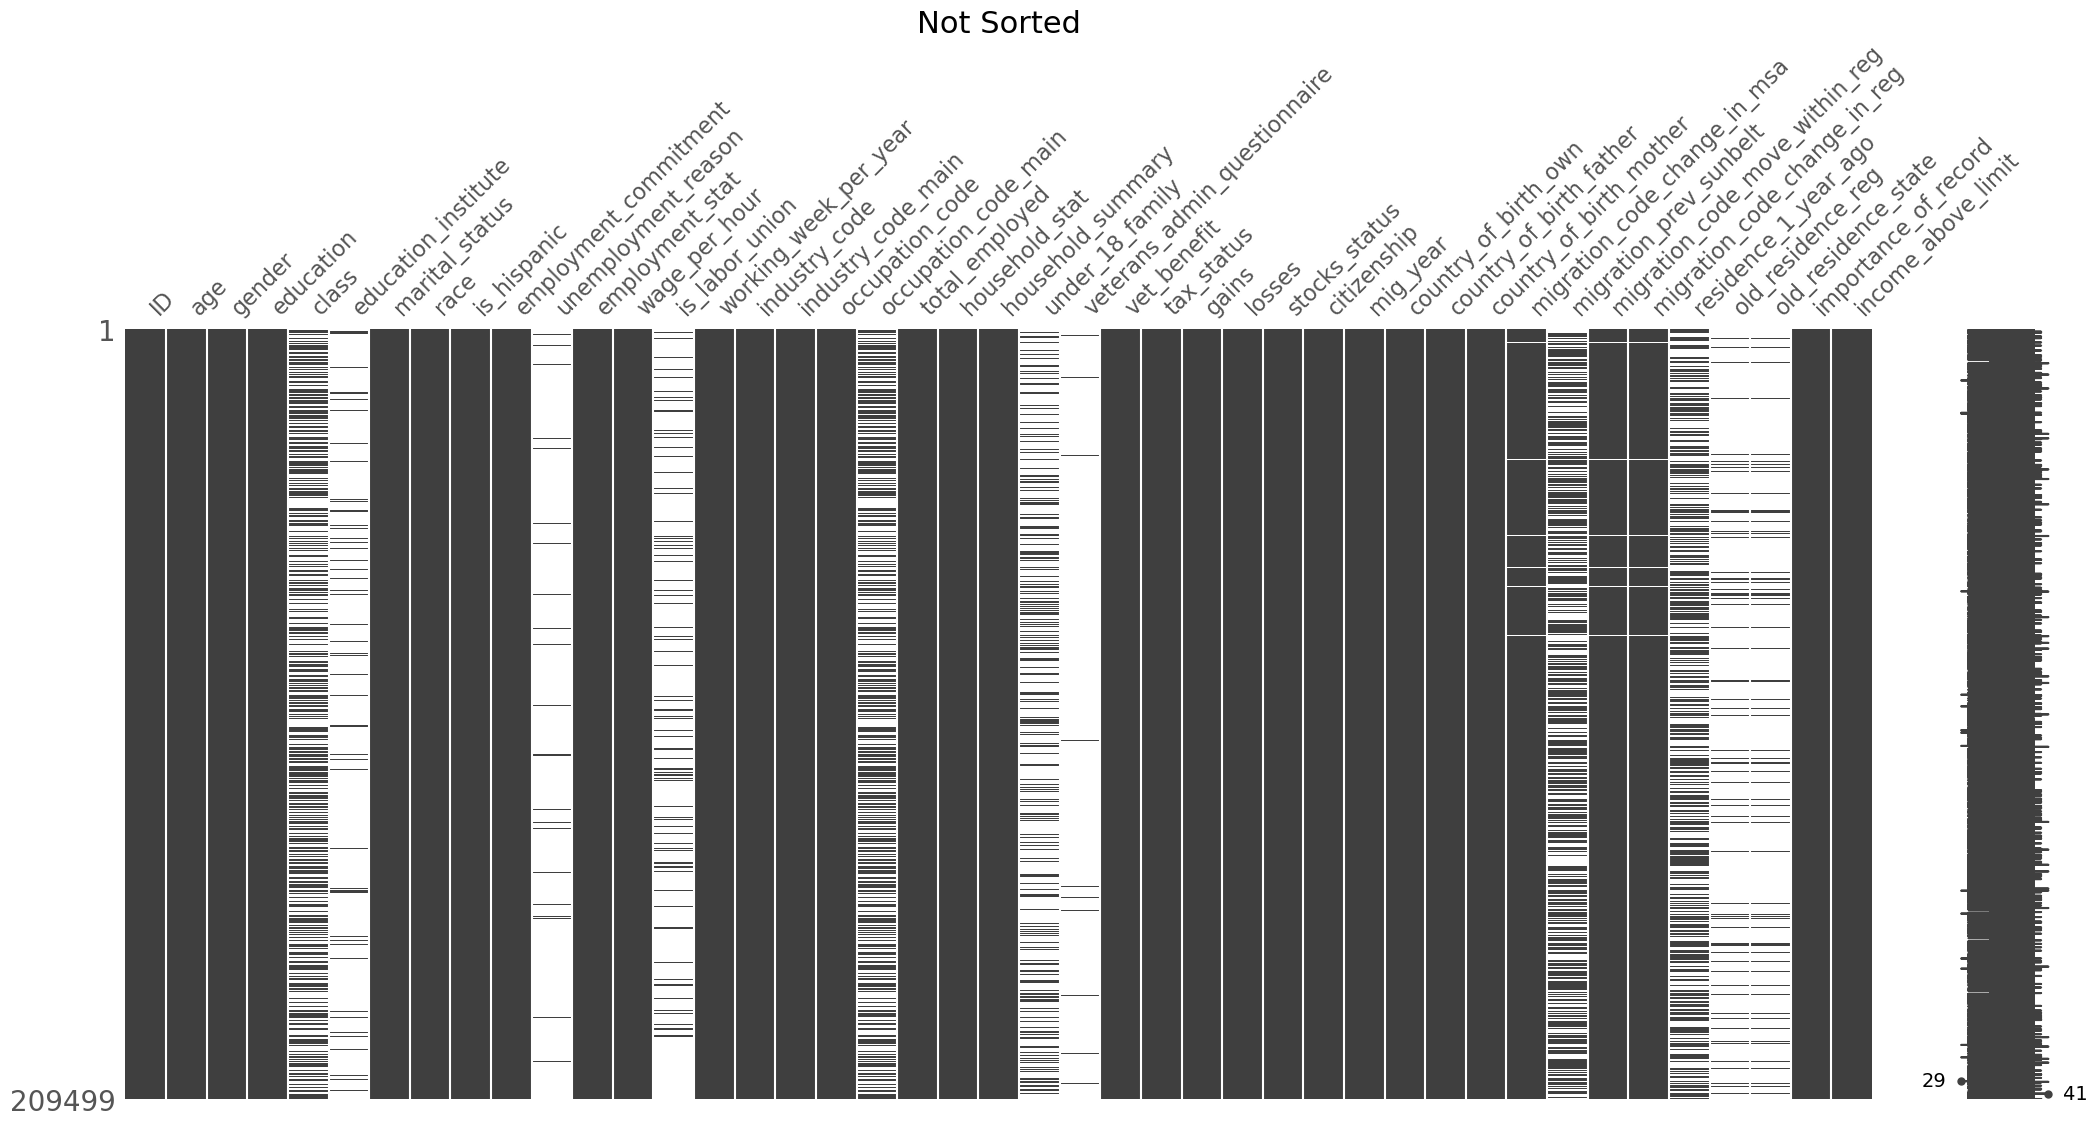

<Figure size 640x480 with 0 Axes>

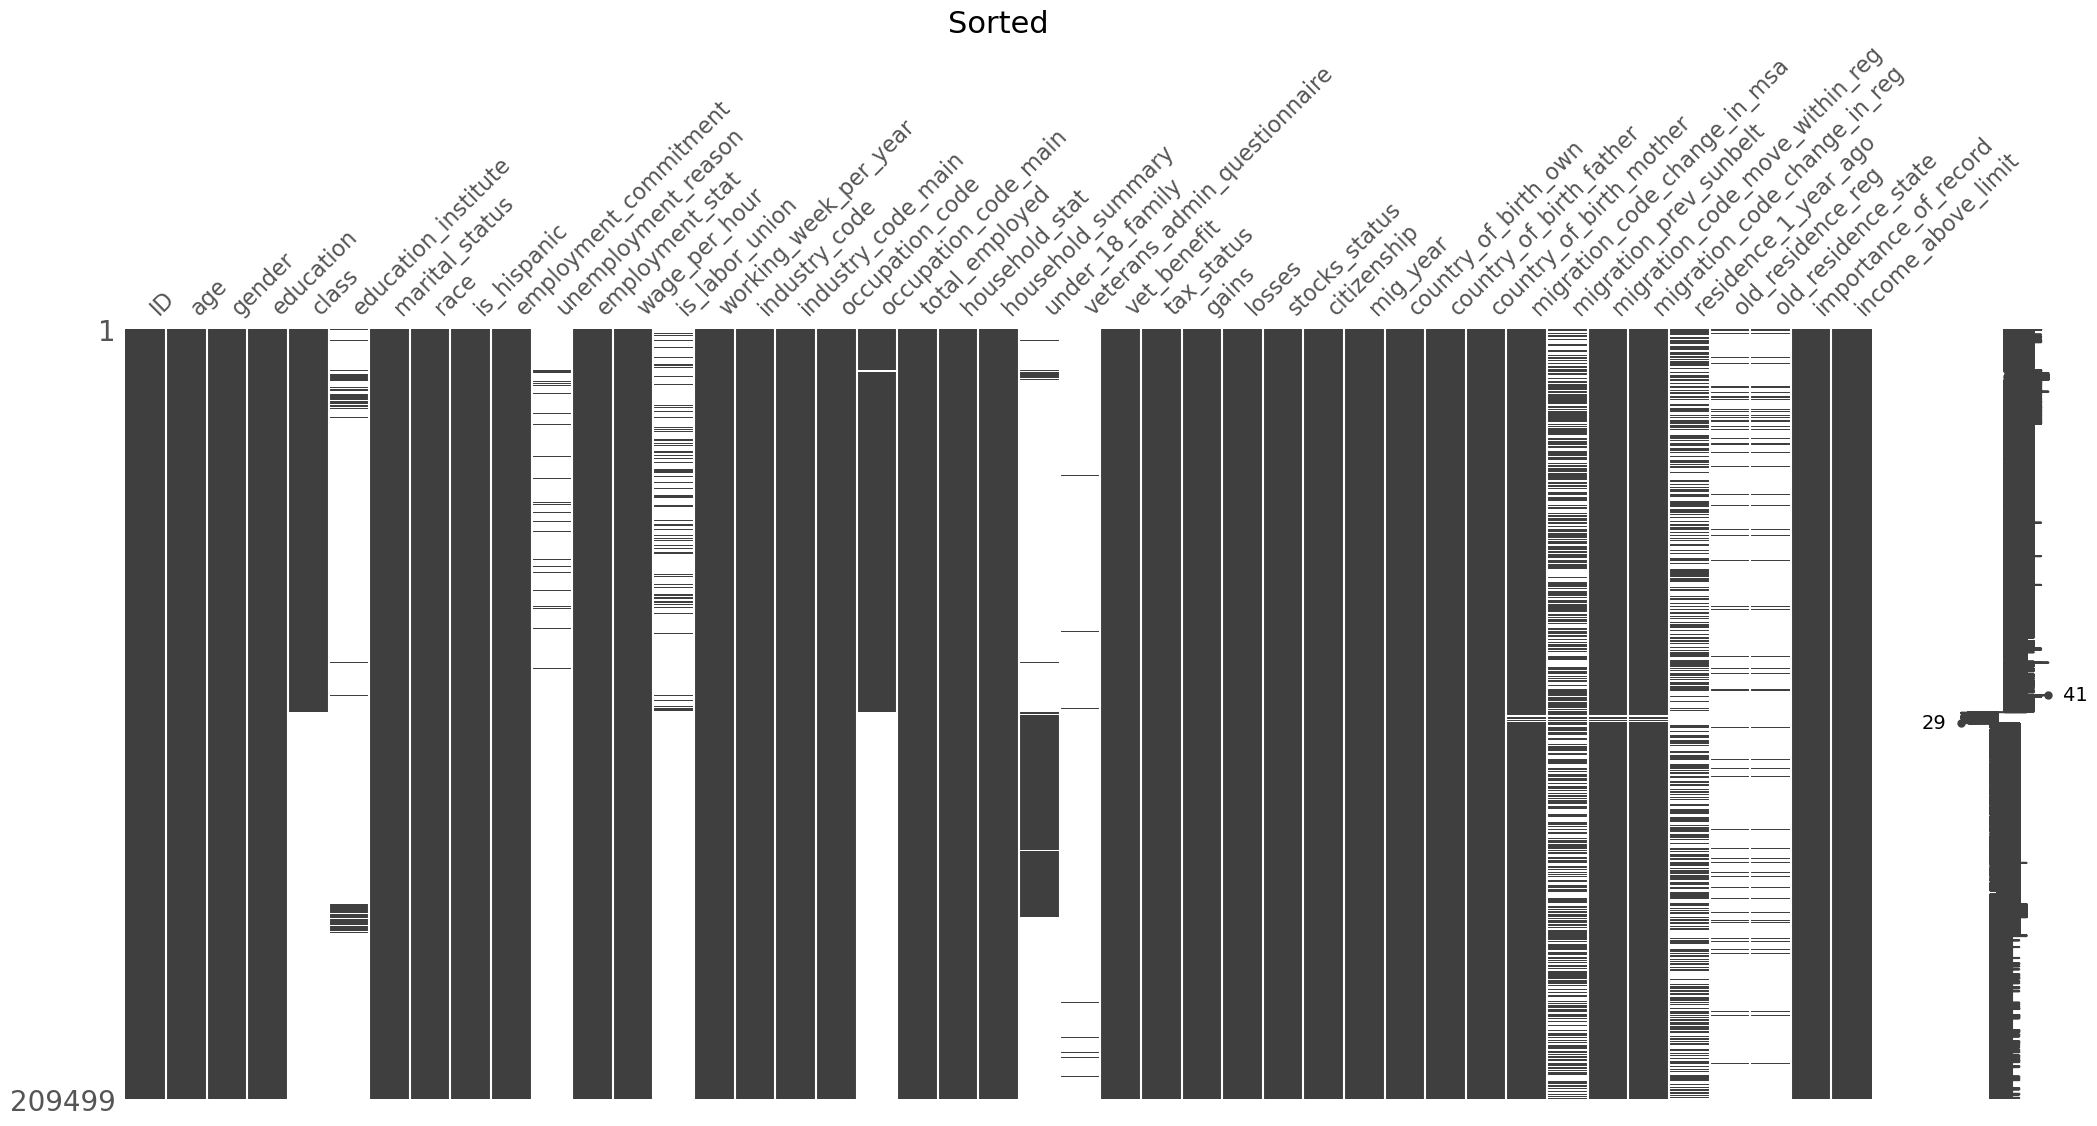

In [211]:
# this python magics will allow plot to be embedded into the notebook
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

# External package: conda install missingno 
import missingno as mn

mn.matrix(df)
plt.title("Not Sorted",fontsize=22)

plt.figure()
mn.matrix(df.sort_values(by=["class","age"]))
plt.title("Sorted",fontsize=22)
plt.show()

In [212]:
# let's clean the dataset a little before moving on

# 1. Remove attributes that just arent useful for us
for col in ['ID', 'education_institue', 'marital_status', 'is_hispanic', 'unemployment_reason', 'industry_code', 'industry_code_main', 'occupation_code', 'occupation_code_main', 'total_employed', 'household_stat', 'household_summary', 'under_18_family', 'veterans_admin_questionnaire', 'tax_status','gains', 'education_institute', 'employment_stat', 'is_labor_union', 'vet_benefit', 'losses', 'stocks_status', 'mig_year', 'country_of_birth_own',  'country_of_birth_father', 'country_of_birth_mother', 'migration_code_change_in_msa', 'migration_prev_sunbelt', 'migration_code_move_within_reg', 'residence_1_year_ago', 'migration_code_change_in_reg', 'old_residence_reg', 'old_residence_state', 'importance_of_record'  ]:
    if col in df:
        del df[col]
        
# Drop class
df.dropna(inplace=True)


# change gender to male - 1, female - 0
# df['gender'].replace({0:'Female',1:'Male'},inplace=True)
# df['gender'] = np.select(
#     [df['gender'].eq(0), df['gender'].eq(1)], ['Female', 'Male'], default=np.nan
# )

df['gender'].replace((' Male', ' Female'), (1, 0), inplace=True)

# change income value to binary
df['income_above_limit'].replace(('Above limit', 'Below limit'), (1, 0), inplace=True)
# df['education'].replace(('10th grade'), ('test'), inplace=False)
df['education'].replace([' 12th grade no diploma', ' 11th grade',' 10th grade',' 9th grade',' 1st 2nd 3rd or 4th grade',' 5th or 6th grade',' Less than 1st grade',' 7th and 8th grade'], 'Less than high school', inplace=True)
df['education'].replace([' Some college but no degree'], ' High school graduate', inplace=True)
df['education'].replace([' Doctorate degree(PhD EdD)',], 'PHD', inplace=True)
df['education'].replace([' Prof school degree (MD DDS DVM LLB JD)',' Masters degree(MA MS MEng MEd MSW MBA)'], 'Master\'s/Prof', inplace=True)
df['education'].replace([' Associates degree-occup /vocational',' Associates degree-academic program'], 'Associates', inplace=True)


print(f"the value is {df['education'].unique()}")

#('Less than high school', 'Less than high school',"Less than high school","Less than high school")


df.info()

the value is ['Less than high school' ' Bachelors degree(BA AB BS)'
 ' High school graduate' "Master's/Prof" 'Associates' 'PHD']
<class 'pandas.core.frame.DataFrame'>
Index: 104254 entries, 2 to 209498
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   age                    104254 non-null  int64 
 1   gender                 104254 non-null  int64 
 2   education              104254 non-null  object
 3   class                  104254 non-null  object
 4   race                   104254 non-null  object
 5   employment_commitment  104254 non-null  object
 6   wage_per_hour          104254 non-null  int64 
 7   working_week_per_year  104254 non-null  int64 
 8   citizenship            104254 non-null  object
 9   income_above_limit     104254 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 8.7+ MB


In [213]:
df.head(20)

,age,gender,education,class,race,employment_commitment,wage_per_hour,working_week_per_year,citizenship,income_above_limit
2,21,1,Less than high school,Federal government,Black,Children or Armed Forces,500,15,Native,0
5,45,1,Bachelors degree(BA AB BS),Private,Asian or Pacific Islander,Children or Armed Forces,825,52,Foreign born- Not a citizen of U S,0
6,53,1,High school graduate,Private,White,Full-time schedules,0,52,Native,0
7,22,0,High school graduate,Private,White,Full-time schedules,0,52,Native,0
9,22,0,Less than high school,Private,Black,Full-time schedules,0,48,Native,0
10,30,1,High school graduate,Local government,White,Full-time schedules,0,39,Native,0
14,43,1,High school graduate,Self-employed-incorporated,White,Children or Armed Forces,0,52,Native,0
18,40,0,Master's/Prof,Private,White,Children or Armed Forces,0,52,Native,1
19,47,1,Bachelors degree(BA AB BS),Local government,White,Children or Armed Forces,0,37,Native,1
20,22,1,Less than high school,Private,Black,Full-time schedules,600,32,Native,0


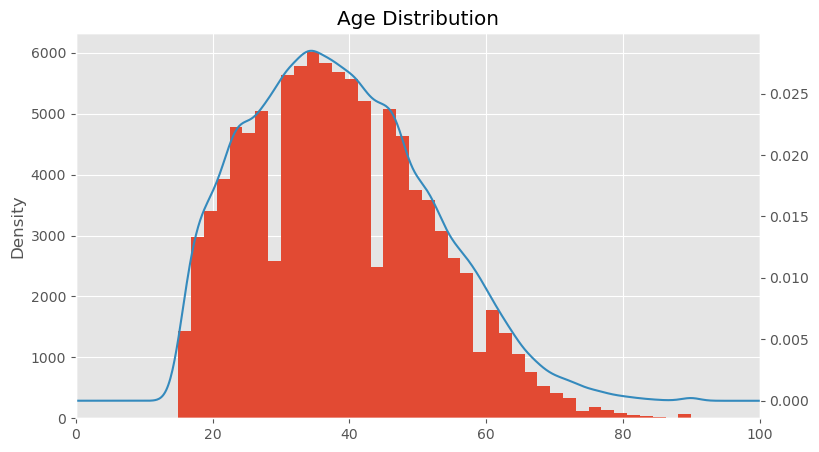

In [214]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(30,5))

plt.subplot(1,3,3)


df['age'].plot.hist(bins=40)
df['age'].plot.kde(bw_method=0.1, secondary_y=True)
plt.xlim(0, 100)
plt.title('Age Distribution')

plt.show()



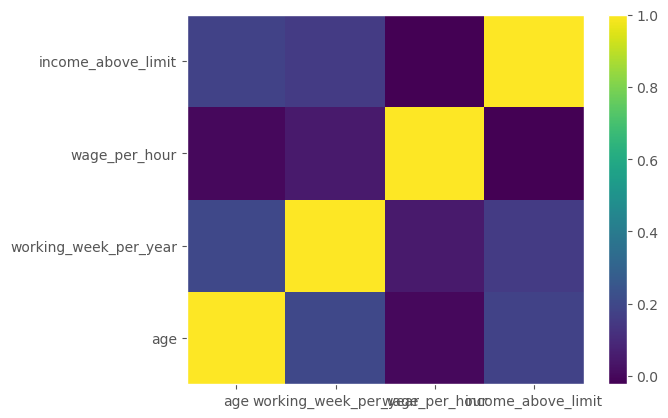

In [215]:
# plot the correlation matrix 
vars_to_use = ['age', 'working_week_per_year', 'wage_per_hour', 'income_above_limit'] # pick vars
plt.pcolor(df[vars_to_use].corr()) # do the feature correlation plot

# fill in the indices
plt.yticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.xticks(np.arange(0.5, len(vars_to_use), 1), vars_to_use)
plt.colorbar()
plt.show()

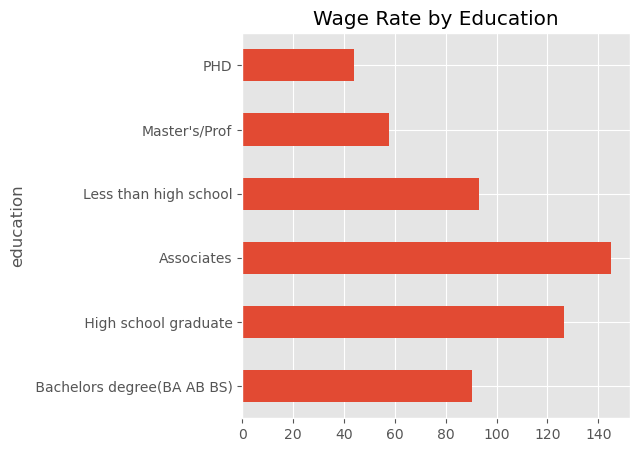

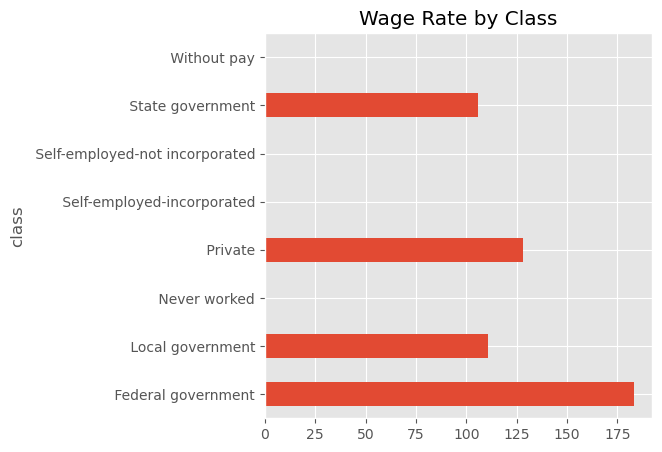

In [216]:
# first group the data
df_grouped = df.groupby(by=['education'])

# tabulate survival rates of each group
wage_rate = df_grouped.wage_per_hour.sum() / df_grouped.wage_per_hour.count()

# plot the bar chart using builtin pandas API
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the figure size to make the plot taller
ax = wage_rate.plot(kind='barh')
ax.set_title('Wage Rate by Education')
plt.show()


df_grouped = df.groupby(by=['class'])

# tabulate survival rates of each group
wage_rate = df_grouped.wage_per_hour.sum() / df_grouped.wage_per_hour.count()

# plot the bar chart using builtin pandas API
fig, ax = plt.subplots(figsize=(5, 5))  # Increase the figure size to make the plot taller
ax = wage_rate.plot(kind='barh')
ax.set_title('Wage Rate by Class')
plt.show()


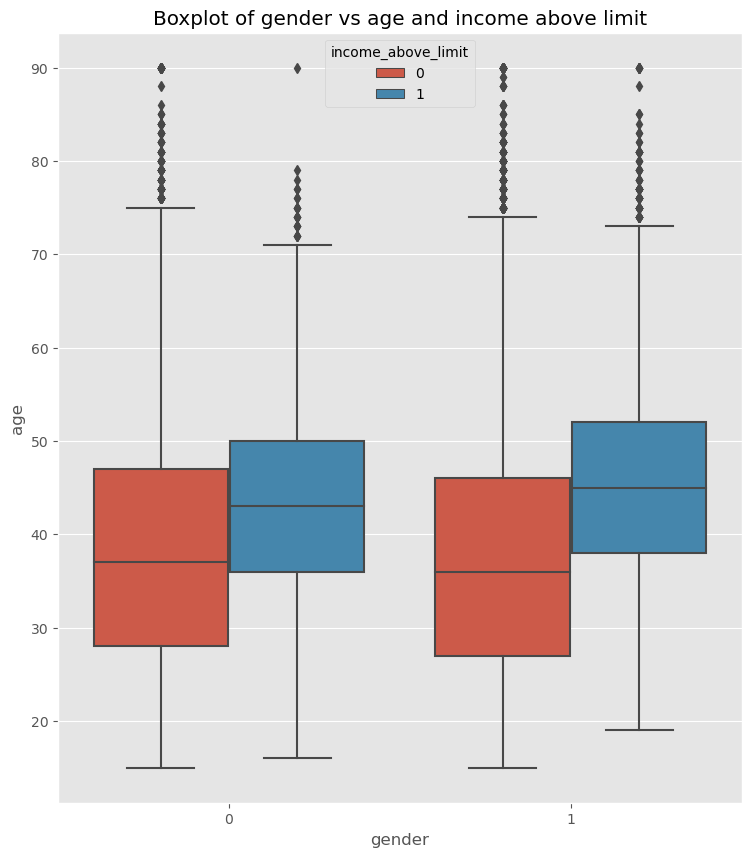

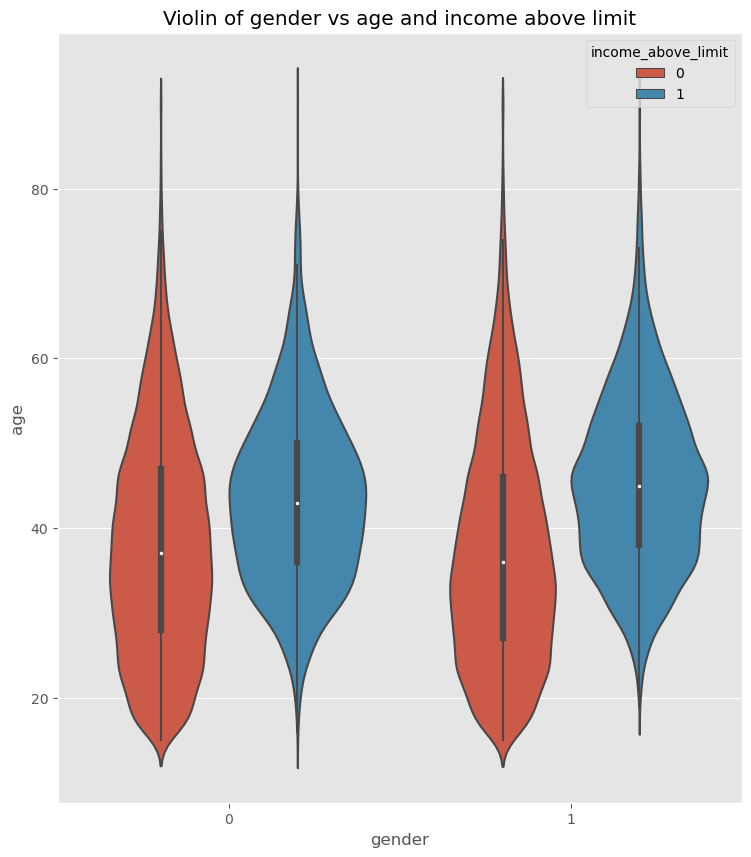

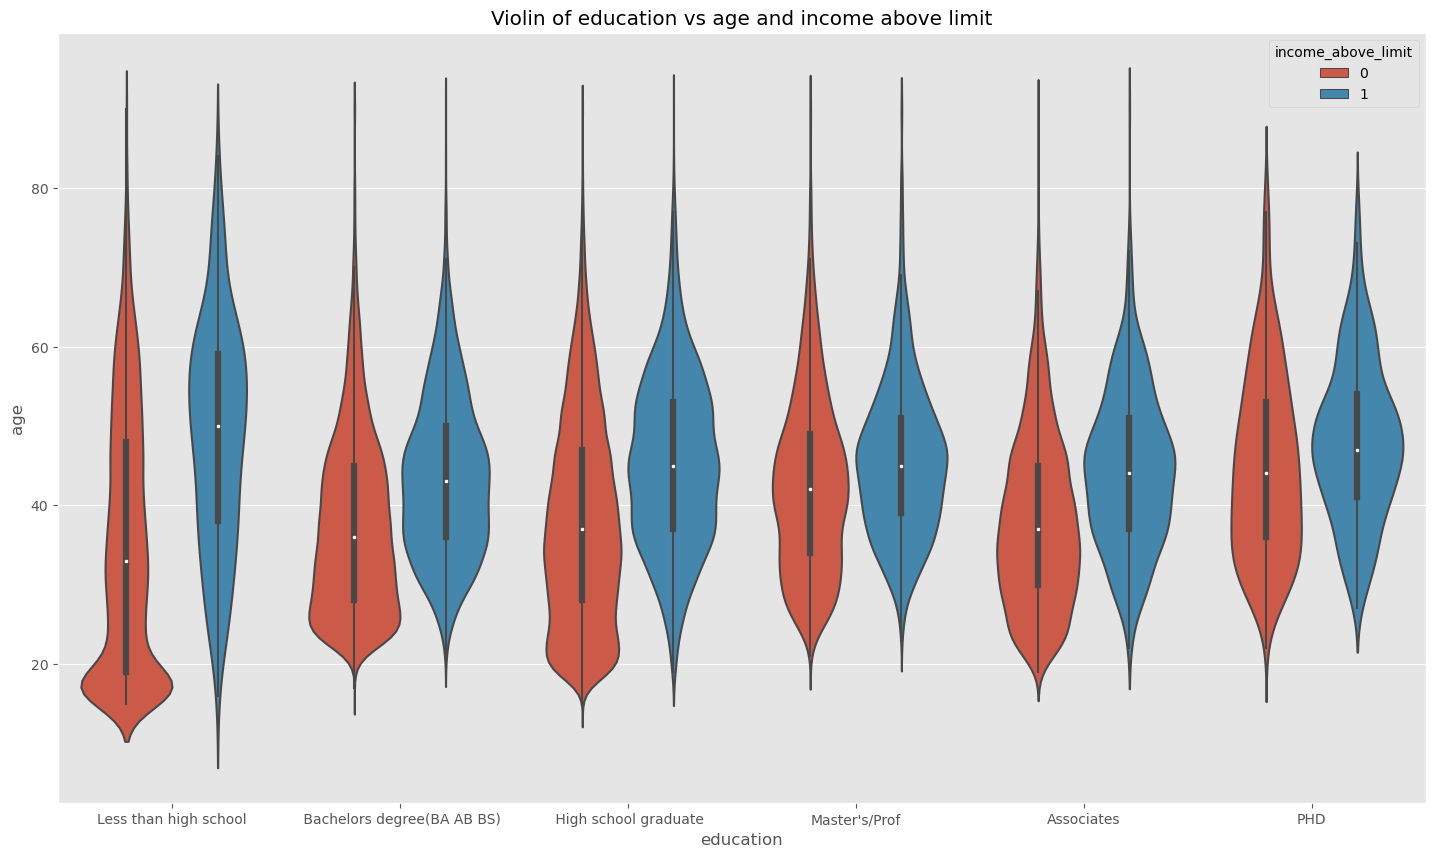

In [220]:
# sns boxplot
plt.subplots(figsize=(30, 10))

plt.subplot(1,3,1)
sns.boxplot(x="gender", y="age", hue="income_above_limit", data=df)
plt.title('Boxplot of gender vs age and income above limit')



# plt.subplot(1,3,3)
# sns.swarmplot(x="gender", y="age", hue="income_above_limit", data=df, s=3) # s controls marker size (like bins or bw)
# plt.title('Swarm Example')

plt.show()

plt.subplots(figsize=(30, 10))
plt.subplot(1,3,2)
sns.violinplot(x="gender", y="age", hue="income_above_limit", data=df)
plt.title('Violin of gender vs age and income above limit')
plt.show()

plt.subplots(figsize=(60, 10))
plt.subplot(1,3,2)
sns.violinplot(x="education", y="age", hue="income_above_limit", data=df)
plt.title('Violin of education vs age and income above limit')
plt.show()

In [218]:
# if False:
#     # ASIDE: UGH so much repeated code, can we do "better"?
#     # this uses slick python functionality as the cost of readability
#     plt.subplots(figsize=(20, 5))
#     args = {'x':"Sex", 'y':"Age", 'hue':"Survived", 'data':df_imputed}
#     for i, plot_func in enumerate([sns.boxplot, sns.violinplot, sns.swarmplot]):
#         plt.subplot(1,3,i+1)
#         plot_func(**args) # more compact, LESS readable

#     plt.show()

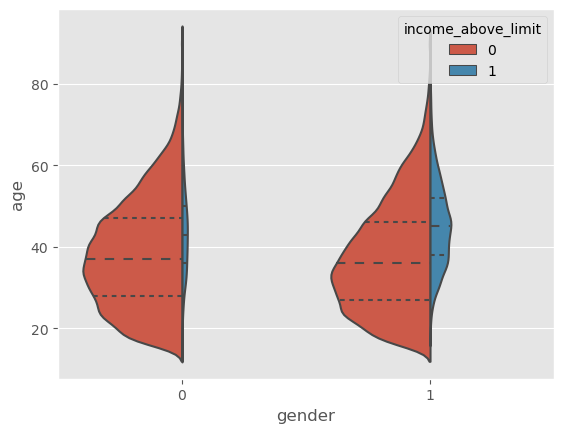

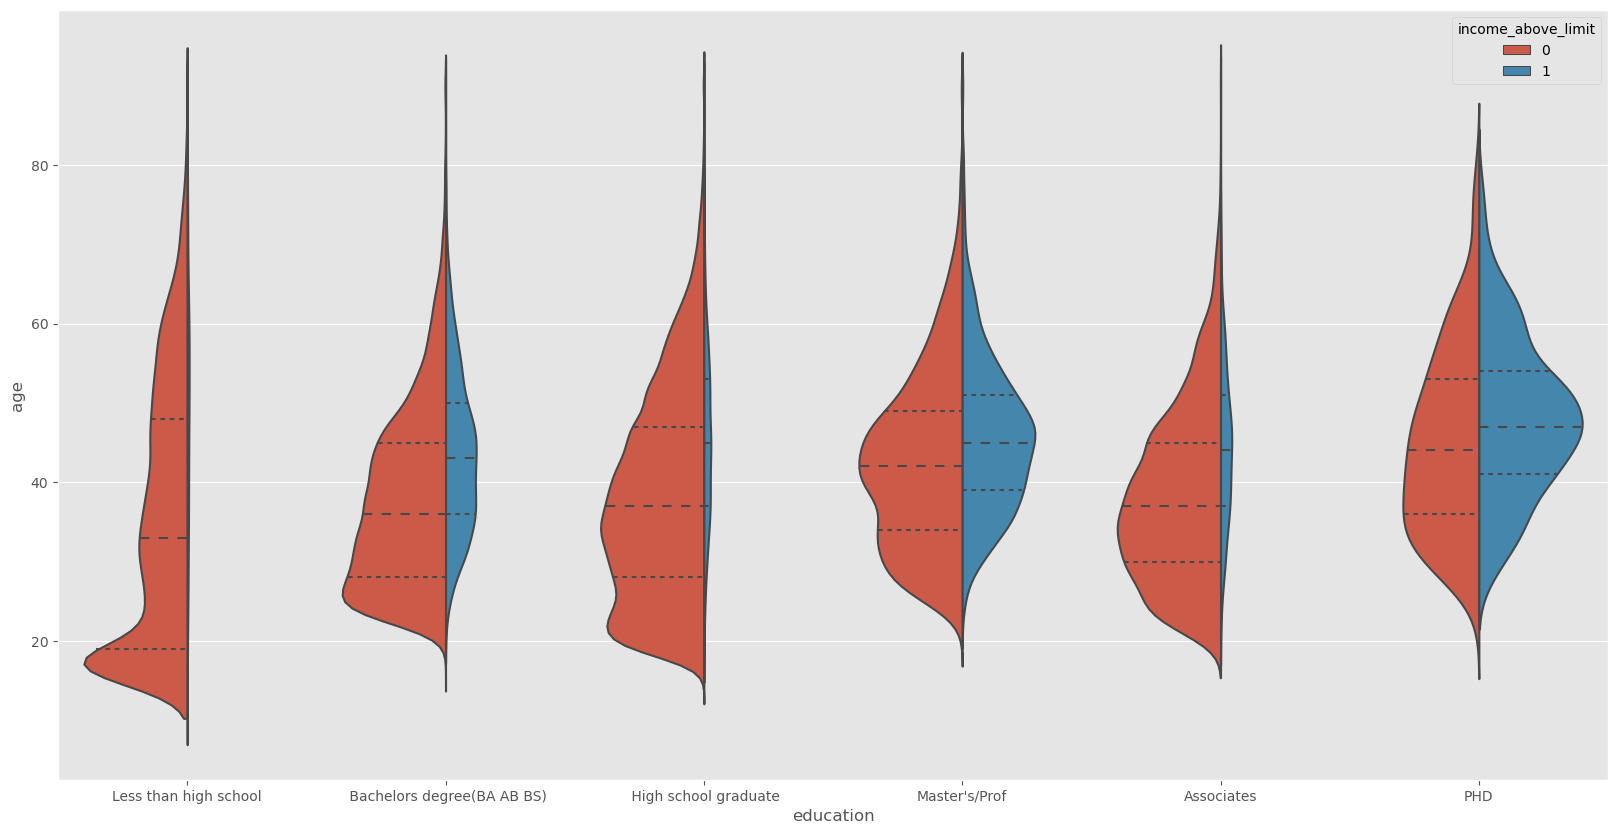

In [230]:
sns.violinplot(x="gender", y="age", hue="income_above_limit", data=df,
               split=True, # split across violins
               inner="quart", # show innner stats like mean, IQR,
               scale="count") # scale the size of the plot by the count within each group

plt.show()

plt.subplots(figsize=(20, 10))  # Increase the figure size to make the plot wider

sns.violinplot(x="education", y="age", hue="income_above_limit", data=df,
               split=True,  # split across violins
               inner="quart",  # show inner stats like mean, IQR,
               scale="count")  # scale the size of the plot by the count within each group

plt.show()